# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

-  A14748203, anray@ucsd.edu, Angela Ray
- A92046642, yix113@ucsd.edu, Yingjing Xia
- A92113764, fazhao@ucsd.edu, Fangzheng Zhao

Start your project here.

## Background & Introduction: 
   
Despite the global progress that has been made on women’s rights in the past couple decades, women’s rights still deserve our attention, especially in developing regions. Higher mortality rate of women compared to that of men still persists in some Asian and African countries, due to reasons such as female infanticide and comparative neglect of female health and nutrition caused by patriarchal bias in traditional values (Sen, 1992; Bunch, 1990). However, recent years have witnessed a positive shift of women’s rights in these developing regions due to the changes of roles that developing countries play within the global economy. 

As industries move their labor-intensive manufacturing from developed countries to developing countries to take advantage of the cheaper labor, an unprecedented need for unskilled, stable but inexpensive workers emerged in these developing countries. The new labor market provided employment opportunities for women in developing countries who were previously confined to their home and worked as unpaid labor in a family setting. The relatively steady pay from the factory jobs in ‘sweatshops’ has the potential of elevating the financial status of women in these regions (Kabeer, 2004). 

An improvement in economic status could aid women in these regions to combat the restrictions imposed on them by the conservative social environment. For example, in Bangladesh, a predominantly agriculture dependent country where half of the population still struggled with poverty, the rise of garment factories provided employment opportunities for women who were previously confined to domestic settings and were provided very limited choices for earning their own living due to cultural restrictions and discriminations at the market place (Kabeer, 2004). Although the working conditions are still very hostile, with long hours, mistreatments from employers, and delayed pay, female garment workers interviewed expressed the opinion that the new-found financial power allows them to renegotiate their marriage relationship, gain self-confidence, and build social networks outside of a domestic setting. Similarly, researchers have found that employment opportunities in labor-intensive manufacturing factories aid women to pursue their relative freedom in Latin America, Southern China, and Turkey, despite the general hostile working conditions judged by Western standards. 

With the support of the findings in previous literature, we would like to further investigate whether an upward development in economy in general helps with the progress of women’s rights, due to a potential increase in employment opportunities and subsequently an improvement of social environment. We would predict that the most significant improvement in women’s rights would be seen in developing countries following an increase in trade and national income. 

References (include links):

- 1)Bunch, Charlotte. "Women's rights as human rights: Toward a re-vision of human rights." Hum. Rts. Q. 12 (1990): 486.https://heinonline.org/HOL/Page?handle=hein.journals/hurq12&div=40&g_sent=1&casa_token=0EMWTuk0MCkAAAAA:lwjCWw_Z-eo3ZuDdgaFZwxmAyFicHRMmvoBehQRbxe4wgrd-bZM5ENHEZ1Uwb1dVtY23l2w79g&collection=journals
- 2)Kabeer, Naila. "Globalization, labor standards, and women's rights: dilemmas of collective (in) action in an interdependent world." Feminist Economics 10.1 (2004): 3-35. https://www.tandfonline.com/doi/abs/10.1080/1354570042000198227
- 3)Sen, Amartya. "Missing women." BMJ: British Medical Journal304.6827 (1992): 587. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1881324/

## Research question: 
    
Does an upward development in economy predict the progress in women’s rights in developing countries?

## Hypothesis: 
The most significant improvement in women’s rights would be seen in developing countries following an increase in trade and national income."""

## Data Description:
Dataset Name: The Human Freedom Index
- Link to the dataset:https://www.kaggle.com/gsutters/the-human-freedom-index
- Number of observations: 1458

The Human Freedom Index presents a broad measure of human freedom, understood as the absence of coercive constraint. This dataset covers 162 countries from the year of 2008 to 2016. Each country is rated with 79 distinctive indicators.

## Privacy / Ethics Considerations:
This dataset is from Kaggle Open Dataset; therefore, we do not need to acquire to acquire any specific permission to use this dataset. Moreover, since the dataset only includes indices about countries, the dataset does not risk exposing any private information of any individual in particular or any potential sensitive information involving national security. Some countries are not included in the dataset, such as North Korea, Iraq, and Somalia, which can be a potential bias when we are analysing all of the developing countries as a whole. However, we do not have control over the missing data and therefore we would not be able to solve this issue. We do not think that that the lack of information on these countries will significantly influence our results, considering the relatively small number of missing data. Currently we do not foresee any potential harm or privacy issues that might be caused by our usage of this dataset in the future.

## Methods:

In [1]:
# Packages:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

### Data Cleaning / Pre-processing

In [2]:
# upload csv.
df_old = pd.read_csv('hfi_cc_2018.csv')

For women's rights, we decided to investigate the following specific indices: women's security, women's movement, parental rights in marriage, inheritance rights for widows, and inheritance rights for daughters. To evaluate the wealth of the nations, we decided to investigate the following indices: revenue from trade taxes, compliance costs of importing and exporting, and government tax income. 

Therefore, we remove unrelated variables from the original datase, and only keep the columns that contain information we need.

In [3]:
#drop all the other columns that are not necessary in this analysis.
df_new = df_old[['year', 'ISO_code', 'countries', 'region','pf_ss_women_fgm', 'pf_ss_women_missing', 'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', 'pf_ss_women',\
                      'pf_movement_women', 'pf_identity_parental_marriage', 'ef_trade_tariffs_revenue', \
                      'ef_trade_tariffs_mean', 'ef_trade', 'ef_trade_tariffs_revenue', 'ef_government_tax_income',\
                      'ef_trade_regulatory_compliance']]

**We drop the countries that have missing data on the target index categories.**

In [4]:
# drop all of the roles that are missing values in any of these columns. 
df_new = df_new.dropna()
df_new.shape

(810, 18)

**Here we sort the rows by countries and year, and then set the index value as countries. In this way, it will be easier for us to further access and analysis.**

In [5]:
# sort the rows by countries and year, and then set the index value as countries. 
df_new_structured = df_new.sort_values(['countries', 'year']).set_index(['countries'])
df_new_structured

,year,ISO_code,region,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_movement_women,pf_identity_parental_marriage,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade,ef_trade_tariffs_revenue,ef_government_tax_income,ef_trade_regulatory_compliance
countries,,,,,,,,,,,,,,,,,
Albania,2011,ALB,Eastern Europe,10.0,7.5,10.0,5.0,7.5,8.333333,5.0,10.0,8.572230,9.00,7.118943,8.572230,10.0,7.447591
Albania,2012,ALB,Eastern Europe,10.0,7.5,10.0,5.0,7.5,8.333333,5.0,10.0,9.613333,9.24,7.115422,9.613333,10.0,7.447591
Albania,2013,ALB,Eastern Europe,10.0,7.5,5.0,5.0,5.0,7.500000,5.0,10.0,9.640000,9.24,7.705771,9.640000,10.0,7.447591
Albania,2014,ALB,Eastern Europe,10.0,7.5,5.0,5.0,5.0,7.500000,5.0,10.0,9.640000,9.24,8.232519,9.640000,9.0,9.223081
Albania,2015,ALB,Eastern Europe,10.0,7.5,5.0,5.0,5.0,7.500000,5.0,10.0,9.353333,9.24,8.112452,9.353333,9.0,9.405328
Albania,2016,ALB,Eastern Europe,10.0,7.5,5.0,5.0,5.0,7.500000,5.0,10.0,9.626667,9.24,8.214900,9.626667,9.0,9.405328
Algeria,2011,DZA,Middle East & North Africa,10.0,7.5,5.0,5.0,5.0,7.500000,0.0,0.0,8.480000,6.28,5.689695,8.480000,7.0,7.053281
Algeria,2012,DZA,Middle East & North Africa,10.0,7.5,5.0,5.0,5.0,7.500000,0.0,0.0,8.480000,6.28,5.306788,8.480000,7.0,7.053281
Algeria,2013,DZA,Middle East & North Africa,10.0,7.5,0.0,0.0,0.0,5.833333,5.0,0.0,8.480000,6.28,4.895672,8.480000,7.0,7.115725


**Now we separate the data by year.**

In [6]:
#separate data by year. 
df_2011 = df_new_structured.loc[df_new_structured['year'] == 2011]
df_2012 = df_new_structured.loc[df_new_structured['year'] == 2012]
df_2013 = df_new_structured.loc[df_new_structured['year'] == 2013]
df_2014 = df_new_structured.loc[df_new_structured['year'] == 2014]
df_2015 = df_new_structured.loc[df_new_structured['year'] == 2015]
df_2016 = df_new_structured.loc[df_new_structured['year'] == 2016]

**Get the mean value of each year.**

In [7]:
# plot line graphs for each year, overlaying them. 
ddf_2011 = df_2011.describe().loc['mean']
ddf_2012 = df_2012.describe().loc['mean']
ddf_2013 = df_2013.describe().loc['mean']
ddf_2014 = df_2014.describe().loc['mean']
ddf_2015 = df_2015.describe().loc['mean']
ddf_2016 = df_2016.describe().loc['mean']

lst_of_columns = ['year', 'ISO_code', 'countries', 'region','pf_ss_women_fgm', 'pf_ss_women_missing',\
                  'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', 'pf_ss_women',\
                      'pf_movement_women', 'pf_identity_parental_marriage', 'ef_trade_tariffs_revenue', \
                      'ef_trade_tariffs_mean', 'ef_trade', 'ef_trade_tariffs_revenue', 'ef_government_tax_income',\
                      'ef_trade_regulatory_compliance']
mean_frames = [ddf_2011, ddf_2012, ddf_2013, ddf_2014, ddf_2015, ddf_2016]
mean_merged = pd.concat(mean_frames, axis = 1).transpose().set_index('year')

a = []
for each in mean_merged.index: 
    a.append(str(each))

mean_merged['whole_year'] = a

## Data Visualization:

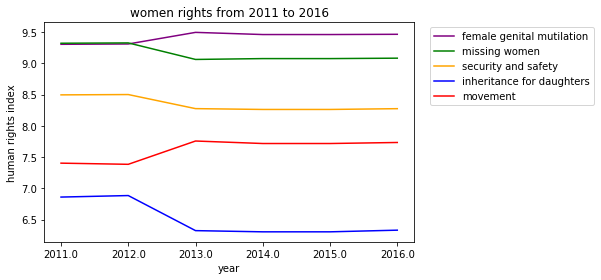

In [8]:
# code for data visualization
# Plot#1 
fig1, ax1 = plt.subplots()
plt.xlabel('year')
plt.ylabel('human rights index')
plt.title('women rights from 2011 to 2016')
fgm = plt.plot(mean_merged.whole_year, mean_merged.pf_ss_women_fgm, color = 'purple')
missing = plt.plot(mean_merged.whole_year, mean_merged.pf_ss_women_missing, color = 'g')
ss = plt.plot(mean_merged.whole_year, mean_merged.pf_ss_women, color = 'orange')
inheritance = plt.plot(mean_merged.whole_year, mean_merged.pf_ss_women_inheritance_daughters, color = 'blue')
mvmnt = plt.plot(mean_merged.whole_year, mean_merged.pf_movement_women, color = 'red')
leg1 = plt.legend(('female genital mutilation','missing women', 'security and safety', 'inheritance for daughters', 'movement'))
fig1.tight_layout()
bb1 = leg1.get_bbox_to_anchor().inverse_transformed(ax1.transAxes)
xOffset = 0.5
bb1.x0 += xOffset
bb1.x1 += xOffset
leg1.set_bbox_to_anchor(bb1, transform = ax1.transAxes)
plt.savefig('WomenRightsByYear.png', bbox_extra_artists = (leg1, ), bbox_inches = 'tight')

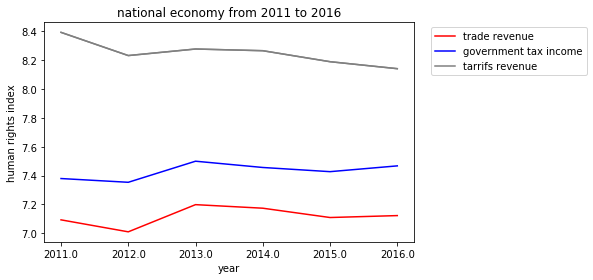

In [9]:
# Plot#2
fig2, ax2 = plt.subplots()
plt.xlabel('year')
plt.ylabel('human rights index')
plt.title('national economy from 2011 to 2016')

plt_trade = plt.plot(mean_merged.whole_year, mean_merged.ef_trade, color = 'red')
plt_tax = plt.plot(mean_merged.whole_year, mean_merged.ef_government_tax_income, color = 'blue')
plt_tarrifs_revenue = plt.plot(mean_merged.whole_year, mean_merged.ef_trade_tariffs_revenue, color = 'grey' )

leg2 = ax2.legend(('trade revenue','government tax income','tarrifs revenue',))
fig2.tight_layout()
bb2 = leg2.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
xOffset2 = 0.48
bb2.x0 += xOffset2
bb2.x1 += xOffset2
leg2.set_bbox_to_anchor(bb2, transform = ax2.transAxes)
plt.savefig('YearByEconomy.png', bbox_extra_artists = (leg2, ), bbox_inches = 'tight')

## Data Analysis and Results

### Data Analysis

(Data Analysis here - General)

In [16]:
# Correlations
import seaborn as sns
corr2011 = df_2011.corr()
corr2011 = corr2011.drop('year')
corr2011 = corr2011.drop('year', axis = 1)
#sns.heatmap(corr2011,
           #xticklabels = corr2011.columns.values,
           #yticklabels = corr2011.columns.values,)

In [17]:
#2012
corr2012 = df_2012.corr()
corr2012 = corr2012.drop('year')
corr2012 = corr2012.drop('year', axis = 1)
corr2012 = corr2012.drop_duplicates().transpose().drop_duplicates().transpose()

#2013
corr2013 = df_2013.corr()
corr2013 = corr2013.drop('year')
corr2013 = corr2013.drop('year', axis = 1)
corr2013 = corr2013.drop_duplicates().transpose().drop_duplicates().transpose()

#2014
corr2014 = df_2014.corr()
corr2014 = corr2014.drop('year')
corr2014 = corr2014.drop('year', axis = 1)
corr2014 = corr2014.drop_duplicates().transpose().drop_duplicates().transpose()

#2015
corr2015 = df_2015.corr()
corr2015 = corr2015.drop('year')
corr2015 = corr2015.drop('year', axis = 1)
corr2015 = corr2015.drop_duplicates().transpose().drop_duplicates().transpose()

#2016
corr2016 = df_2016.corr()
corr2016 = corr2016.drop('year')
corr2016 = corr2016.drop('year', axis = 1)
corr2016 = corr2016.drop_duplicates().transpose().drop_duplicates().transpose()

In [18]:
# correlations between trade tarriffs mean and women rights
S_corr_2011 = corr2011['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2012 = corr2012['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2013 = corr2013['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2014 = corr2014['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2015 = corr2015['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2016 = corr2016['ef_trade_tariffs_mean'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
lst_columns = ['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']
lst_corr = [S_corr_2011, S_corr_2012, S_corr_2013, S_corr_2014, S_corr_2015, S_corr_2016]
corr_df_tarriffs = pd.concat(lst_corr, axis = 1, join = 'inner').drop_duplicates().transpose()
corr_df_tarriffs['year'] = ['2011', '2012', '2013', '2014', '2015', '2016']

corr_df_tarriffs = corr_df_tarriffs.set_index('year')
corr_df_tarriffs

,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_movement_women
year,,,,,,
2011,0.308441,0.474401,0.419509,0.459867,0.422432,0.399558
2012,0.308689,0.469281,0.422955,0.459809,0.424069,0.382804
2013,0.323013,0.348652,0.416278,0.388769,0.457415,0.327609
2014,0.323581,0.359604,0.426746,0.399649,0.467641,0.324413
2015,0.323675,0.371514,0.438083,0.411466,0.483727,0.340580
2016,0.348466,0.377888,0.429525,0.410312,0.492857,0.327884


(Data Analysis here)

In [19]:
# correlations between trade tarriffs revenue and women rights
S_corr_2011_1 = corr2011['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2012_1 = corr2012['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2013_1 = corr2013['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2014_1 = corr2014['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2015_1 = corr2015['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]
S_corr_2016_1 = corr2016['ef_trade_tariffs_revenue'].loc[['pf_ss_women_fgm',\
                        'pf_ss_women_inheritance_widows',\
                        'pf_ss_women_inheritance_daughters', \
                    'pf_ss_women_inheritance_daughters', 'pf_ss_women_inheritance', \
                          'pf_ss_women', 'pf_movement_women']]

lst_corr_1 = [S_corr_2011_1, S_corr_2012_1, S_corr_2013_1, S_corr_2014_1, S_corr_2015_1, S_corr_2016_1]
corr_df_tarriffs_rev = pd.concat(lst_corr_1, axis = 1).drop_duplicates().transpose().drop_duplicates()
corr_df_tarriffs_rev['year'] = ['2011', '2012', '2013', '2014', '2015', '2016']

corr_df_tarriffs_rev = corr_df_tarriffs_rev.set_index('year')
corr_df_tarriffs_rev

,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_movement_women
year,,,,,,
2011,0.263493,0.297458,0.315880,0.315731,0.284564,0.246932
2012,0.209932,0.267914,0.274600,0.279724,0.237569,0.265291
2013,0.186314,0.238708,0.172603,0.209144,0.235882,0.168530
2014,0.208804,0.273776,0.212157,0.247062,0.283787,0.210319
2015,0.200182,0.214581,0.143239,0.181950,0.218864,0.164239
2016,0.189873,0.205252,0.136049,0.173532,0.207210,0.165172


(Data Analysis here)

### Results

(Results here - a paragraph) 

## Conclusions & Discussion: 

If our hypothesis is correct, it would mean that labor-intensive manufacturing industries in developing countries do predict with improving women's rights in these regions by providing women with more financial freedom. This information could provide directions for future interventions of improving women's rights in places where women's rights are historically neglected. For example, if manufacturing jobs in 'sweatshops' actually help these female workers to maintain their relative freedom, international organizations should be cautious about applying a universal payrate standard or working condition standard, since these forced interventions, despite being well-intended, could take away the 'competitive edge' of these unskilled women workers and therefore cause them to lose their jobs. 

One potential pitfall of this study is that we do not have a comprehensive measure for women's financial freedom specifically or women's average income in these countries. Therefore, if the methods don’t work, we can find some other datasets with comprehensive measures of women’s financial freedom (i.e. women's incomes, etc.) and compare these data with this dataset to see whether there are any more significant relationships. If the data does not show significant relationship between national income and women’s rights, it could mean that women were not able to reap their part of increase of national wealth and the manufacturing jobs did not significantly improve their life condition. Therefore, it might suggest that future international intervention for women’s rights in these regions should focus on how to create more employment opportunities for women specifically in these regions so that women could reap these financial benefits in the future.